In [1]:
import scipy
scipy.__version__

'1.1.0'

機率密度函數 $f(x) = \frac{\textstyle 1}{\textstyle \sqrt{2\pi}}e^{-\frac{x^{2}}{2}}$

計算x在區間[a,b]的機率就是將上式微分:
$$\int^{b}_{a}f(x)dx = \int^{b}_{a}\frac{\textstyle 1}{\textstyle \sqrt{2\pi}}e^{-\frac{x^{2}}{2}} dx$$

In [2]:
import scipy.integrate as sci
def f(x):
    import numpy as np
    return 1/pow(2*np.pi, 0.5)*np.exp(-0.5*x**2)

In [3]:
f(10)

7.69459862670642e-23

### 國家教育研究院，雙語詞彙、學術名詞暨辭書資訊網
* 數學名辭可至國家教育研究院，雙語詞彙、學術名詞暨辭書資訊網查詢
http://terms.naer.edu.tw/

In [4]:
sci.quad(func = f, a=-1.0, b=1.0) #依序為積分值和最大誤差

(0.682689492137086, 7.579375928402476e-15)

In [5]:
sci.fixed_quad(func = f, a=-1.0, b=1.0) #自適應積分(self-adaptive integration)

(0.6826897353882191, None)

In [6]:
sci.quadrature(func = f, a=-1.0, b=1.0) #高斯求積

(0.6826894922280757, 5.174690009823735e-09)

In [7]:
sci.romberg(function = f, a=-1.0, b=1.0) #Romberg積分法

0.6826894921481355

#### 金融領域常用到插值法，可以用interpolate子模組運算。

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
from scipy import interpolate

In [9]:
t = np.array([0.25,0.5,0.75,1.0,3.0,5.0])
t_new = np.array([0.25,0.5,0.75,1.0,2.0,3.0,4.0,5.0])
rates = np.array([0.27344, 0.27898, 0.28382, 0.2882, 0.30414, 0.31746])
types = ["nearest","zero","slinear","quadratic","cubic"]

nearest [0.27344 0.27898 0.28382 0.2882  0.2882  0.30414 0.30414 0.31746]
zero [0.27344 0.27898 0.28382 0.2882  0.2882  0.30414 0.30414 0.31746]
slinear [0.27344 0.27898 0.28382 0.2882  0.29617 0.30414 0.3108  0.31746]
quadratic [0.27344    0.27898    0.28382    0.2882     0.29879098 0.30414
 0.31036301 0.31746   ]
cubic [0.27344    0.27898    0.28382    0.2882     0.29937206 0.30414
 0.30825294 0.31746   ]


Text(0.5, 1.0, '用插值法求2年期和4年期的遠期國債到期收益率')

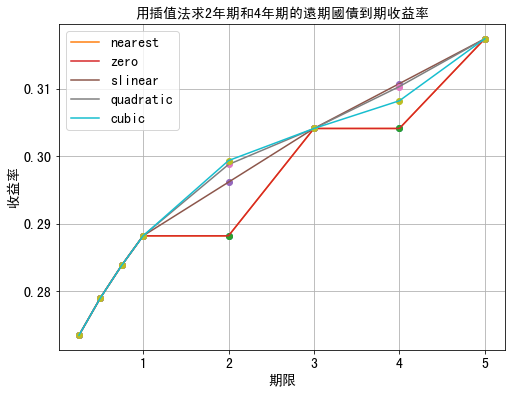

In [10]:
plt.figure(figsize=(8,6))
for i in types:
    f=interpolate.interp1d(x=t, y=rates, kind=i)
    rates_new=f(t_new)
    print(i, rates_new)
    plt.plot(t_new,rates_new,'o')
    plt.plot(t_new,rates_new,'-',label=i)
    plt.xticks(fontsize=14)
    plt.xlabel('期限', fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel('收益率', fontsize=14, rotation=90)
    plt.legend(loc=0, fontsize=14)
    plt.grid()
plt.title('用插值法求2年期和4年期的遠期國債到期收益率', fontsize=14)

#### 求解方程組

$$\left[\begin{array}{cc} 
0.3731\% & -0.1838\% & -0.3087\% & -2.4112\% \\ 
2.1066\% & 0.1842\% & -0.0344\% & 1.1704\%\\
-0.4854\% & -1.6544\% & -3.3391\% & -2.9563\% \\
0.6098\% & -0.3738\% & 0.7123\% & -1.4570\% 
\end{array} \right] 
\left[ \begin{array}{c} 
w_{1}\\
w_{2}\\
w_{3}\\
w_{4}
\end{array} \right] 
=\left[ \begin{array}{c} 
-1.05654\%\\ 
0.70534\%\\
-2.56367\%\\
-0.38289\%
\end{array}
\right]
$$

經計算後，投資組合中，中國石油配置比率($w_{1}$)為10%，工商銀行比率($w_{2}$)為20%, 上汽集團比率($w_{3}$)為30%, 寶鋼股份比率($w_{4}$)為40%。

In [11]:
from scipy import linalg
stock_return = np.array([[0.003731, -0.001838, -0.003087, -0.024112], [0.021066, 0.001842, -0.000344, 0.011704],
                         [-0.004854, -0.016544, -0.033391, -0.029563], [0.006098, -0.003738, 0.007123, -0.01457]])
port_return = np.array([-0.0105654, 0.0070534, -0.0256367, -0.0038289])
weight = linalg.solve(a=stock_return, b=port_return)
stock=np.array(['中國石油', '工商銀行', '上汽集團', '寶鋼股份'])
for i in range(0,4):
    print(stock[i],round(weight[i],2))

中國石油 0.1
工商銀行 0.2
上汽集團 0.3
寶鋼股份 0.4


#### 最適化求解
<table style="width: 417.667px; height: 169px;">
<tbody>
<tr style="height: 65px;">
<td style="width: 76px; height: 65px;">證券簡稱&nbsp;</td>
<td style="width: 121px; height: 65px;">
<p>&nbsp;2017年至2018年</p>
<p>平均年化收益率</p>
</td>
<td style="width: 120px; height: 65px;">
<p>&nbsp;收盤價</p>
<p>(2018年12月28日)</p>
</td>
<td style="width: 86.6667px; height: 65px;">&nbsp;股票beta值</td>
</tr>
<tr style="height: 25.6667px;">
<td style="width: 76px; height: 25.6667px;">&nbsp;貴州茅台</td>
<td style="width: 121px; height: 25.6667px;">&nbsp;34.9032%</td>
<td style="width: 120px; height: 25.6667px;">&nbsp;590.01</td>
<td style="width: 86.6667px; height: 25.6667px;">&nbsp;1.64</td>
</tr>
<tr style="height: 25px;">
<td style="width: 76px; height: 25px;">工商銀行&nbsp;</td>
<td style="width: 121px; height: 25px;">&nbsp;15.5143%</td>
<td style="width: 120px; height: 25px;">5.29&nbsp;</td>
<td style="width: 86.6667px; height: 25px;">1.41&nbsp;</td>
</tr>
<tr style="height: 26px;">
<td style="width: 76px; height: 26px;">上汽集團&nbsp;</td>
<td style="width: 121px; height: 26px;">&nbsp;13.2796%</td>
<td style="width: 120px; height: 26px;">&nbsp;26.67</td>
<td style="width: 86.6667px; height: 26px;">1.21&nbsp;</td>
</tr>
<tr style="height: 26px;">
<td style="width: 76px; height: 26px;">寶鋼股份&nbsp;</td>
<td style="width: 121px; height: 26px;">5.5905%&nbsp;</td>
<td style="width: 120px; height: 26px;">&nbsp;6.50</td>
<td style="width: 86.6667px; height: 26px;">1.06&nbsp;</td>
</tr>
</tbody>
</table>
投資機構資金為1億元，以12月28日收盤價投資，以求投資組合收益率極大化，要求整體投資組合beta值不超過1.4，股票不準券空，需計算應配置的每隻股票權重和股數。設股價為$P_{i}$，年化收益率為$R_{i}$，beta值用$\beta_{i}$表示，每隻股票的投資組合比重為$w_{i}$，$i=1,2,3,4$。

$$max_{w_{i}}(\sum^{4}_{i=1}R_{i}w_{i})\\
s.t.\\
\sum^{4}_{i=1}w_{i} = 1\\
\sum^{4}_{i=1}\beta_{i}w_{i} \leq 1.4\\
w_{i} > 0$$

對應購買的最適股票數量等於$100000000w_{i}/P_{i}$

In [12]:
import scipy.optimize as sco
P = np.array([590.01,5.29, 26.67, 6.50])
R = np.array([0.349032, 0.155143, 0.132796, 0.055905])
b = np.array([1.64, 1.41, 1.21, 1.06])
#step1:
#以def定義求解最大值貨最小值函數，即參數fun
def f(w):
    w=np.array(w)
    return -np.sum(R*w)
#step2:
#將限制條件以字典格是輸入，邊界條件以元組方式輸入
#cons=({'type':'eq', 'fun':lambda x: 限制條件1}, {'type':'ineq', 'fun':lambda x:限制條件2}, .......)
cons = ({'type':'eq', 'fun':lambda w: np.sum(w)-1}, {'type':'ineq', 'fun':lambda w: 1.4-np.sum(w*b)})
#bnds=以元組形式輸入變量的邊界值，猜測可能的最小值與最大值
bnds = ((0,1),(0,1),(0,1),(0,1))
#step3:
#應用子套件optimize的minimize函數求最適化值 minimize(fun,x0,method, bounds,constraints),x0即是初始猜測值,以數組形式輸入
#SLSOP就是Sequential Least Squares Programming
result = sco.minimize(f, [0.25, 0.25, 0.25, 0.25], method = 'SLSQP', bounds = bnds, constraints=cons)
result

     fun: -0.22804894822767985
     jac: array([-0.349032, -0.155143, -0.132796, -0.055905])
 message: 'Optimization terminated successfully.'
    nfev: 24
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([5.11920517e-01, 2.22044605e-16, 2.87240675e-01, 2.00838808e-01])

In [13]:
result['x'].round(3)

array([0.512, 0.   , 0.287, 0.201])

In [14]:
-f(result['x']).round(3)

0.228

In [15]:
#未考慮A股市場的交易規則，購買數量必須是100的整數倍。
shares = 100000000*result['x']/P
shares = shares.round(3)
print('貴州茅台的股數:', shares[0])
print('工商銀行的股數:', shares[1])
print('上汽集團的股數:', shares[2])
print('寶鋼股份的股數:', shares[3])

貴州茅台的股數: 86764.719
工商銀行的股數: 0.0
上汽集團的股數: 1077017.904
寶鋼股份的股數: 3089827.81


In [16]:
## 若風險偏好降低，beta值改為不超過1.2
cons_new = ({'type':'eq', 'fun':lambda w: np.sum(w)-1}, {'type':'ineq', 'fun':lambda w: 1.2-np.sum(w*b)})
result_new = sco.minimize(f, [0.25, 0.25, 0.25, 0.25], method = 'SLSQP', bounds = bnds, constraints=cons_new)
result_new['x'].round(3)
-f(result_new['x']).round(3)

0.127

In [17]:
shares_new = 100000000*result_new['x']/P
shares_new = shares_new.round(0)
print('貴州茅台的股數:', shares_new[0])
print('工商銀行的股數:', shares_new[1])
print('上汽集團的股數:', shares_new[2])
print('寶鋼股份的股數:', shares_new[3])

貴州茅台的股數: 23844.0
工商銀行的股數: 0.0
上汽集團的股數: 1459924.0
寶鋼股份的股數: 7230093.0


#### 統計分析

In [18]:
import scipy.stats as st
HS300_SZ180 = pd.read_excel('滬深300指數與上證180指數的日漲跌幅(2016-2018).xlsx',sheet_name="Sheet1", header=0, index_col=0)
HS300_SZ180.describe()

,沪深300涨跌幅,上证180涨跌幅
count,731.000000,731.000000
mean,-0.000223,-0.000154
std,0.011826,0.011400
min,-0.070206,-0.067217
25%,-0.005144,-0.004876
50%,0.000350,0.000126
75%,0.005075,0.005022
max,0.043167,0.041031


In [19]:
st.describe(HS300_SZ180)

DescribeResult(nobs=731, minmax=(array([-0.07020589, -0.06721739]), array([0.04316748, 0.04103086])), mean=array([-0.00022295, -0.00015435]), variance=array([0.00013986, 0.00012996]), skewness=array([-1.04965359, -1.05201293]), kurtosis=array([6.21642174, 6.47677757]))

In [20]:
st.kurtosis(HS300_SZ180)

array([6.21642174, 6.47677757])

In [21]:
st.moment(HS300_SZ180, moment=2) #2階動差

array([0.00013967, 0.00012978])

In [22]:
st.mode(HS300_SZ180)

ModeResult(mode=array([[-0.07020589, -0.06721739]]), count=array([[1, 1]]))

In [23]:
st.skew(HS300_SZ180)

array([-1.04965359, -1.05201293])

#### 連續機率分析

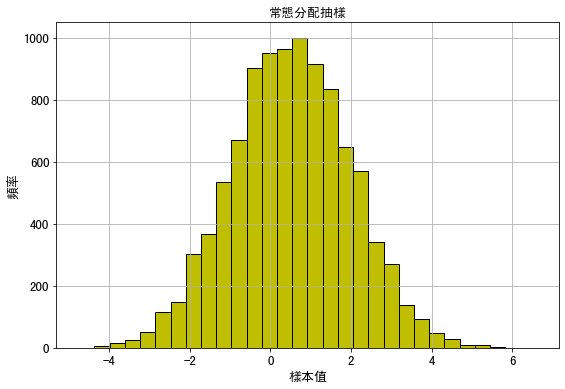

In [24]:
I = 10000
rand_norm = st.norm.rvs(loc=0.5,scale=1.5,size=I)
plt.figure(figsize=(9,6))
plt.hist(rand_norm,bins=30,facecolor='y',edgecolor='k')
plt.xticks(fontsize=13)
plt.xlabel('樣本值', fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('頻率', fontsize=13, rotation=90)
plt.title('常態分配抽樣', fontsize=13)
plt.grid()

In [25]:
st.norm.cdf(x=0.2,loc=0.5,scale=1.5)

0.42074029056089696

In [26]:
st.norm.pdf(x=0,loc=0.5,scale=1.5)

0.2515888184619955

In [27]:
st.norm.ppf(q=0.8,loc=0.5,scale=1.5)

1.7624318503593714

#### kstest檢定 $H_{0}:$樣本值服從的分配等於給定的分配。 $H_{1}:$樣本值服從的分配不等於給定的分配。

In [28]:
st.kstest(rvs=HS300_SZ180.iloc[:,0],cdf='norm',args=(0,0.01)) #檢定滬深300指數，在1%顯著水準下拒絕服從常態分配。

KstestResult(statistic=0.06143965782012728, pvalue=0.007676309470080689)

In [29]:
st.kstest(rvs=HS300_SZ180.iloc[:,1],cdf='norm',args=(0,0.01)) #檢定上證180指數，在1%顯著水準下拒絕服從常態分配。

KstestResult(statistic=0.06728275172673695, pvalue=0.002541881698417514)

#### Anderson-Darling檢定 $H_{0}:$樣本值服從的分配等於給定的分配。 $H_{1}:$樣本值服從的分配不等於給定的分配。

In [30]:
st.anderson(x=HS300_SZ180.iloc[:,0],dist='norm') #檢定滬深300指數，在1%顯著水準下拒絕服從常態分配。

AndersonResult(statistic=13.722242637355293, critical_values=array([0.573, 0.652, 0.783, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [31]:
st.anderson(x=HS300_SZ180.iloc[:,1],dist='norm') #檢定上證180指數，在1%顯著水準下拒絕服從常態分配。

AndersonResult(statistic=14.488924670257802, critical_values=array([0.573, 0.652, 0.783, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

#### Shapiro-Wilk檢定，僅用於常態性檢定，當樣本量超過5000時，會不準確。

In [32]:
st.shapiro(HS300_SZ180.iloc[:,0])#檢定滬深300指數，在1%顯著水準下拒絕服從常態分配。

(0.9102216958999634, 2.3796587124692655e-20)

In [33]:
st.shapiro(HS300_SZ180.iloc[:,1])#檢定上證180指數，在1%顯著水準下拒絕服從常態分配。

(0.9052609801292419, 6.96993531688405e-21)

#### Normaltest檢定

In [34]:
st.normaltest(HS300_SZ180, axis=0)#同步檢定滬深300指數，上證180指數。

NormaltestResult(statistic=array([198.88554498, 202.19928147]), pvalue=array([6.49460351e-44, 1.23875068e-44]))

### StatsModels 模組

In [35]:
import statsmodels
statsmodels.__version__

'0.9.0'

In [36]:
import pandas as pd
import statsmodels.api as sm

In [38]:
ICBC_HS300 = pd.read_excel('工商銀行與滬深300指數.xlsx', sheet_name="Sheet1", header=0, index_col=0)
ICBC_HS300 = ICBC_HS300.dropna()
Y = ICBC_HS300.iloc[:,0]
X = ICBC_HS300.iloc[:,1]
X_addcons = sm.add_constant(X)
model = sm.OLS(endog=Y, exog=X_addcons)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ICBC   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     281.2
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           1.29e-53
Time:                        23:28:06   Log-Likelihood:                 2302.7
No. Observations:                 731   AIC:                            -4601.
Df Residuals:                     729   BIC:                            -4592.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      1.521      0.129      -0.000       0.001
HS300          0.5449      0.032     16.768      0.000       0.481       0.609
==============================================================================
Omnibus:                       90.243   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              420.477
Skew:                           0.451   Prob(JB):                     4.95e-92
Kurtosis:                       6.604   Cond. No.                         84.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
result.params

const    0.000584
HS300    0.544855
dtype: float64

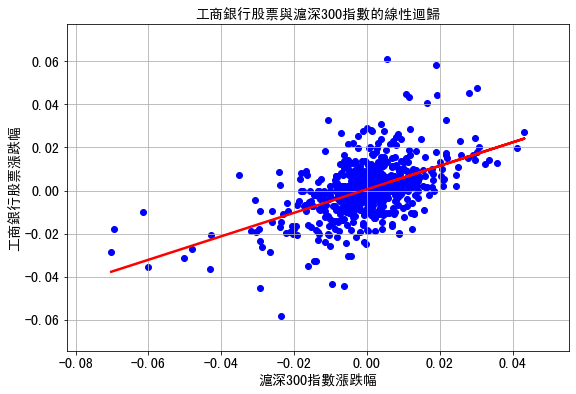

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
plt.scatter(X,Y, c='b', marker='o')
plt.plot(X,result.params[0]+result.params[1]*X, 'r-',lw=2.5)
plt.xticks(fontsize=14)
plt.xlabel('滬深300指數漲跌幅', fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('工商銀行股票漲跌幅', fontsize=14, rotation=90)
plt.title('工商銀行股票與滬深300指數的線性迴歸', fontsize=14)
plt.grid()

### 波動率模型與ARCH模組

### 自迴歸條件異變異數模型(Autoregressive conditional heteroskedasticity model)

#### 估計波動率

$$u_{i} = \ln\frac{S_{i}}{S_{i-1}}$$

$$\sigma^{2}_{n} = \frac{1}{m-1}\sum^{m}_{i-1}(u_{n-i}-\bar{u})^{2}$$


$$\bar{u} = \frac{1}{m}\sum^{m}_{i=1}u_{n-i}$$

$$u_{i}=\frac{S_{i}-S_{i-1}}{S_{i-1}}$$

$$\sigma^{2}_{n} = \frac{1}{m}\sum^{m}_{i=1}u^{2}_{n-i}$$

$$u_{n-i} = \frac{S_{n-i}-S_{n-i-1}}{S_{n-i-1}}$$

#### ARCH模型

$$\sigma^{2}_{n} = \sum^{m}_{i-1}\alpha_{i}u^{2}_{n-i}$$


$$\sum^{m}_{i=1}\alpha_{i} = 1$$

$$\sigma^{2}_{n} = \gamma V_{L} + \sum^{m}_{i=1}\alpha_{i}u^{2}_{n-i}$$

$$\gamma + \sum^{m}_{i=1}\alpha_{i} = 1$$


令$\omega = \gamma V_{L}$

$$\sigma^{2}_{n} = \omega + \sum^{m}_{i=1}\alpha_{i}u^{2}_{n-i}$$


In [ ]:
# pip install arch==4.7.0

In [44]:
import arch
arch.__version__

'4.7.0'

In [45]:
from arch import arch_model

In [47]:
model_arch = arch_model(y=HS300_SZ180.iloc[:,0], mean='Constant', lags=0, vol='ARCH', p=1, o=0, q=0, dist='normal')
model_garch = arch_model(y=HS300_SZ180.iloc[:,0], mean='Constant', lags=0, vol='GARCH', p=1, o=0, q=1, dist='normal')

In [48]:
result_arch = model_arch.fit()
result_arch.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: -2231.7562144341227
Iteration:      2,   Func. Count:     17,   Neg. LLF: -2231.865941611332
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -2231.8659428139517
            Iterations: 3
            Function evaluations: 25
            Gradient evaluations: 2


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:               沪深300涨跌幅   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                       ARCH   Log-Likelihood:                2231.87
Distribution:                  Normal   AIC:                          -4457.73
Method:            Maximum Likelihood   BIC:                          -4443.95
                                        No. Observations:                  731
Date:                Sun, Mar 08 2020   Df Residuals:                      728
Time:                        23:41:17   Df Model:                            3
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -4.0404e-04  4.553e-04     -0.887      0.375 [-1.296e-03,4.884e-04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      9.7770e-05  1.150e-05      8.503  1.848e-17 [7.523e-05,1.203e-04]
alpha[1]       0.3000      0.119      2.525  1.157e-02   [6.713e-02,  0.533]
============================================================================

Covariance estimator: robust
"""

ARCH(1)模型參數 $\omega = 0.00009777, \alpha = 0.3$，模型就是
$$\sigma^{2}_{n} = 0.00009777+0.3u^{2}_{n-1}$$

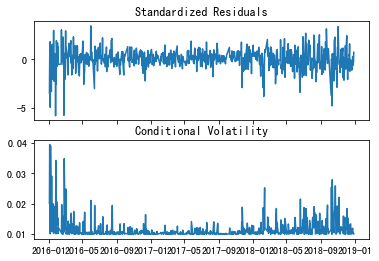

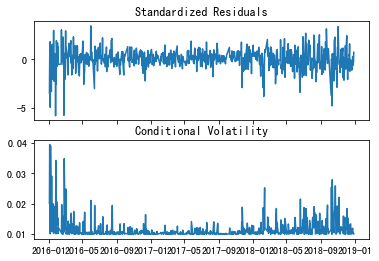

In [54]:
result_arch.plot()

#### GARCH模型

$$\sigma^{2}_{n} = \gamma V_{L} + \alpha u^{2}_{n-1} + \beta \sigma^{2}_{n-1}$$

$$\gamma + \alpha +\beta = 1$$

$$\sigma^{2}_{n} = \gamma V_{L} + \sum^{p}_{i=1}\alpha_{i}u^{2}_{n-i} + \sum^{q}_{j=1}\beta_{j} \sigma^{2}_{n-j}$$

令$\omega = \gamma V_{L}$, GARCH(1,1)

$$\sigma^{2}_{u} = \omega + \alpha u^{2}_{n-1} + \beta \alpha^{2}_{n-1}$$


In [55]:
result_garch = model_garch.fit()
result_garch.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: -2337.3780970779944
Iteration:      2,   Func. Count:     21,   Neg. LLF: -2339.798333548434
Iteration:      3,   Func. Count:     36,   Neg. LLF: -2339.8026919020167
Iteration:      4,   Func. Count:     52,   Neg. LLF: -2339.8024509873344
Iteration:      5,   Func. Count:     65,   Neg. LLF: -2339.8027016165397
Iteration:      6,   Func. Count:     77,   Neg. LLF: -2339.802963409855
Iteration:      7,   Func. Count:     90,   Neg. LLF: -2339.803225370226
Iteration:      8,   Func. Count:    102,   Neg. LLF: -2339.803500321733
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -2339.8035016443528
            Iterations: 12
            Function evaluations: 102
            Gradient evaluations: 8


C:\Users\HP\Anaconda3\envs\universe\lib\site-packages\arch\univariate\base.py:571: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:               沪深300涨跌幅   R-squared:                      -0.003
Mean Model:             Constant Mean   Adj. R-squared:                 -0.003
Vol Model:                      GARCH   Log-Likelihood:                2339.80
Distribution:                  Normal   AIC:                          -4671.61
Method:            Maximum Likelihood   BIC:                          -4653.23
                                        No. Observations:                  731
Date:                Mon, Mar 09 2020   Df Residuals:                      727
Time:                        00:01:18   Df Model:                            4
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         4.6872e-04  9.245e-05      5.070  3.984e-07 [2.875e-04,6.499e-04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.7935e-06  1.812e-11  1.542e+05      0.000 [2.794e-06,2.794e-06]
alpha[1]       0.1000  3.724e-02      2.686  7.242e-03   [2.702e-02,  0.173]
beta[1]        0.8800  2.730e-02     32.236 5.607e-228     [  0.826,  0.933]
============================================================================

Covariance estimator: robust

WARNING: The optimizer did not indicate successful convergence. The message was
Positive directional derivative for linesearch. See convergence_flag.
"""

GARCH(1,1)模型參數 $\omega = 0.0000027935, \alpha = 0.1, \beta = 0.88$，模型就是
$$\sigma^{2}_{n} = 0.0000027935+0.1u^{2}_{n-1}+0.88\sigma^{2}_{n-1}$$

In [51]:
result_garch.params

mu          0.000469
omega       0.000003
alpha[1]    0.099999
beta[1]     0.879991
Name: params, dtype: float64

In [52]:
import numpy as np
vol=np.sqrt(result_garch.params[1]/(1-result_garch.params[2]-result_garch.params[3]))
print('利用GARCH(1,1)模型得到長期波動率(每日):', round(vol,4))

利用GARCH(1,1)模型得到長期波動率(每日): 0.0118


#### 滬深300指數的漲跌幅長期波動率是$\sqrt{V_{L}}=\sqrt{0.0000027935/(1-0.1-0.88)}=0.0118$，亦即每日波動率為1.18%。

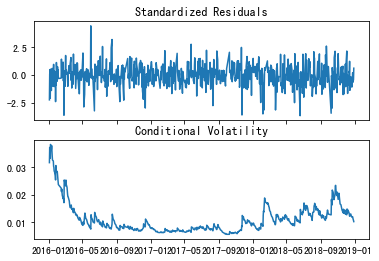

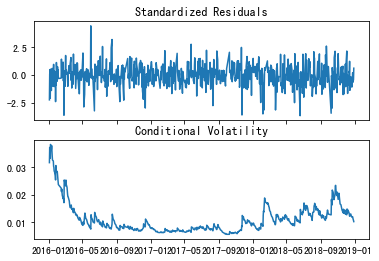

In [56]:
result_garch.plot()